### Sentiment Analysis on Weather Dataset <br> Machine Learning Models <br> Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Naive Bayes

#### Importing Necessary Packages and Loading Dataset

In [65]:
import pandas as pd    
import numpy as np
df = pd.read_csv('weather-agg-DFE.csv')

In [66]:
df.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


#### Formatting Dataset for Sentiment Analysis

In [67]:
df['text'] = df['tweet_text']
df.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text,text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   _unit_id                                                                        1000 non-null   int64  
 1   _canary                                                                         0 non-null      float64
 2   _unit_state                                                                     1000 non-null   object 
 3   _trusted_judgments                                                              1000 non-null   int64  
 4   _last_judgment_at                                                               1000 non-null   object 
 5   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 6   what_emotion_does

In [69]:
df=df.drop(columns=['_canary', 'gold_answer', 'tweet_text','_unit_id','_unit_state','_trusted_judgments','_last_judgment_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [70]:
# convert text column to string for easier processing
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   string 
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 31.4+ KB


In [71]:
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                      2
Name: count, dtype: int64

In [72]:
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != 'Tweet not related to weather condition']
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != "I can't tell"]
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Positive                                        231
Name: count, dtype: int64

In [73]:
df = df.replace("Negative", -1)
df = df.replace("Neutral / author is just sharing information", 0)
df = df.replace("Positive", 1)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather': "label"}, inplace=True)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather:confidence':"label_Confidence"}, inplace=True)

In [74]:
df.head()

,label,label_Confidence,tweet_id,text
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,1,0.6897,82843785,Im going to lunch early today. The weather i...
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


#### Logistic Regression

In [75]:
x=df.text.values

In [76]:
y=df.label.values

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42)

#### Vectorizing

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(x_train)
X_train=vec.transform(x_train)
X_test=vec.transform(x_test)

In [79]:
print(f"Before vectorizing {x_train[0]}. After vectorizing {X_train[0]}")

Before vectorizing Sunny weather for driving back to San Diego, spending the long Memorial Day weekend w/hubby in 10 days. What makes you smile today? :). After vectorizing   (0, 12)	1
  (0, 292)	1
  (0, 611)	1
  (0, 612)	1
  (0, 648)	1
  (0, 688)	1
  (0, 834)	1
  (0, 1017)	1
  (0, 1045)	1
  (0, 1196)	1
  (0, 1220)	1
  (0, 1253)	1
  (0, 1668)	1
  (0, 1772)	1
  (0, 1804)	1
  (0, 1867)	1
  (0, 1926)	1
  (0, 1968)	1
  (0, 1969)	1
  (0, 2111)	1
  (0, 2121)	1
  (0, 2133)	1
  (0, 2226)	1


In [80]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred=classifier.predict(X_test)


In [82]:
y_pred

array([ 0,  0, -1, -1, -1,  0,  0,  0,  1, -1,  1, -1,  1,  0,  1, -1,  0,
       -1, -1,  1, -1, -1,  0,  1, -1, -1,  1,  1, -1,  1,  1,  0,  1, -1,
       -1, -1,  1, -1,  0, -1, -1, -1,  1,  0,  1,  1, -1,  1, -1,  0,  1,
        1,  0,  1,  0, -1,  0,  1,  1, -1, -1,  0, -1, -1, -1,  0,  1, -1,
        1,  0,  1,  1,  0, -1,  0,  1, -1,  1,  0,  0,  1,  1, -1,  1,  0,
        1,  0, -1, -1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,
       -1,  0,  0, -1, -1,  1,  1,  0, -1,  1,  1,  1,  1, -1,  0, -1,  1,
        0,  0, -1,  1,  1,  0, -1,  1, -1,  1, -1,  1, -1,  1,  0, -1,  0,
        1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  1,  1, -1,  0,  1,  0,  1])

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

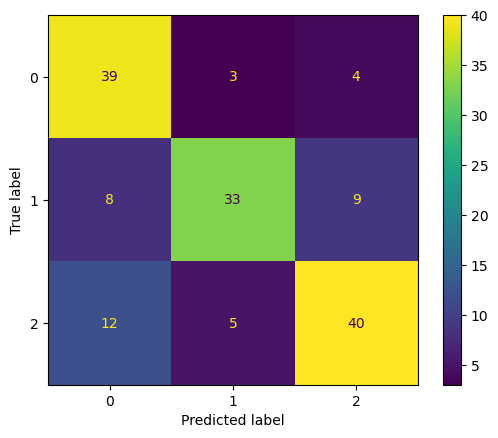

In [84]:
disp.plot()

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.85      0.74        46
           0       0.80      0.66      0.73        50
           1       0.75      0.70      0.73        57

    accuracy                           0.73       153
   macro avg       0.74      0.74      0.73       153
weighted avg       0.74      0.73      0.73       153



#### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dtc.predict(X_test)
y_pred

array([ 0,  0, -1, -1, -1,  0,  0,  0,  1, -1,  1, -1, -1, -1,  1,  0,  0,
       -1, -1, -1, -1,  0,  1,  1, -1, -1,  1,  0,  1,  1,  1,  0,  1, -1,
       -1, -1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  1, -1, -1, -1,  0, -1,
       -1,  1,  1,  0, -1,  0, -1, -1,  1,  1,  0, -1, -1, -1,  0,  1,  1,
        1,  0,  0,  1, -1, -1, -1,  1,  1,  1,  0,  0,  1,  1,  1, -1, -1,
       -1,  0, -1, -1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  1, -1,  1,  0,
       -1,  0,  0,  1,  0,  1,  1, -1, -1,  1, -1,  0, -1, -1,  0, -1,  1,
        0,  0,  1, -1, -1,  0, -1,  1,  1,  1, -1,  1, -1,  1,  0, -1,  0,
       -1,  1, -1,  0,  0, -1, -1, -1, -1,  0,  1,  1,  1,  0,  1,  0, -1])

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

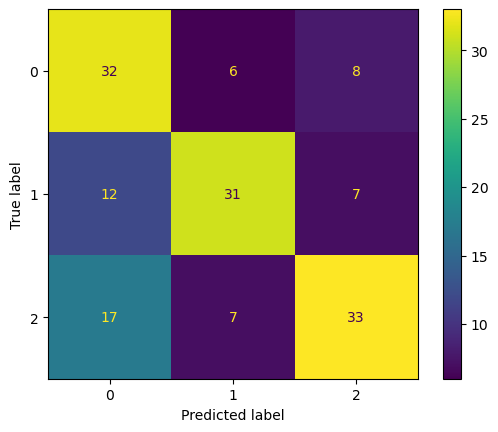

In [89]:
disp.plot()

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.70      0.60        46
           0       0.70      0.62      0.66        50
           1       0.69      0.58      0.63        57

    accuracy                           0.63       153
   macro avg       0.64      0.63      0.63       153
weighted avg       0.64      0.63      0.63       153



#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [92]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

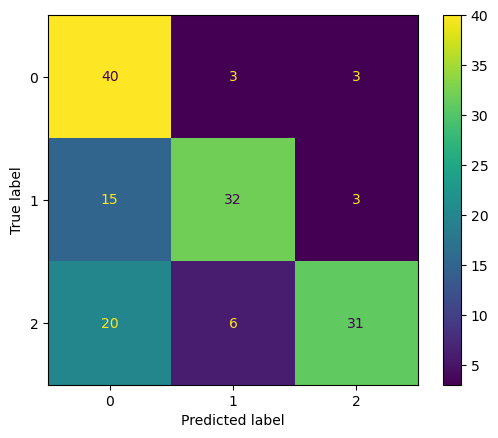

In [93]:
disp.plot()

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.87      0.66        46
           0       0.78      0.64      0.70        50
           1       0.84      0.54      0.66        57

    accuracy                           0.67       153
   macro avg       0.72      0.68      0.67       153
weighted avg       0.73      0.67      0.67       153



#### Support Vector Machine

In [95]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

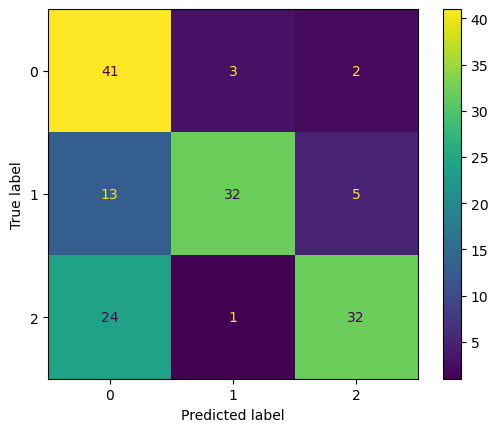

In [96]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.89      0.66        46
           0       0.89      0.64      0.74        50
           1       0.82      0.56      0.67        57

    accuracy                           0.69       153
   macro avg       0.75      0.70      0.69       153
weighted avg       0.75      0.69      0.69       153



#### K-Nearest Neighbor

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

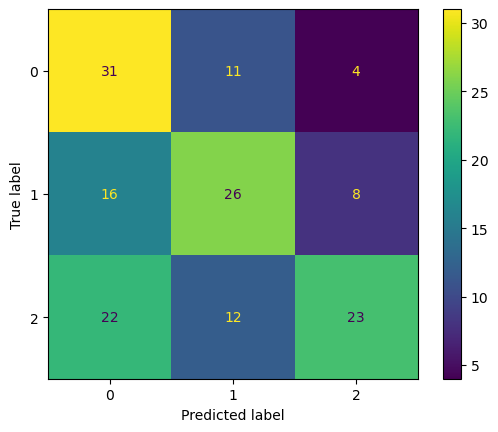

In [99]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.45      0.67      0.54        46
           0       0.53      0.52      0.53        50
           1       0.66      0.40      0.50        57

    accuracy                           0.52       153
   macro avg       0.55      0.53      0.52       153
weighted avg       0.55      0.52      0.52       153



#### Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

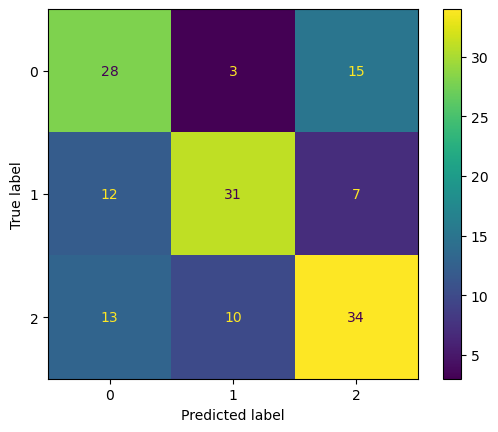

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.61      0.57        46
           0       0.70      0.62      0.66        50
           1       0.61      0.60      0.60        57

    accuracy                           0.61       153
   macro avg       0.61      0.61      0.61       153
weighted avg       0.62      0.61      0.61       153



#### Machine Learning Model Pipeline

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.text.values
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [106]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))


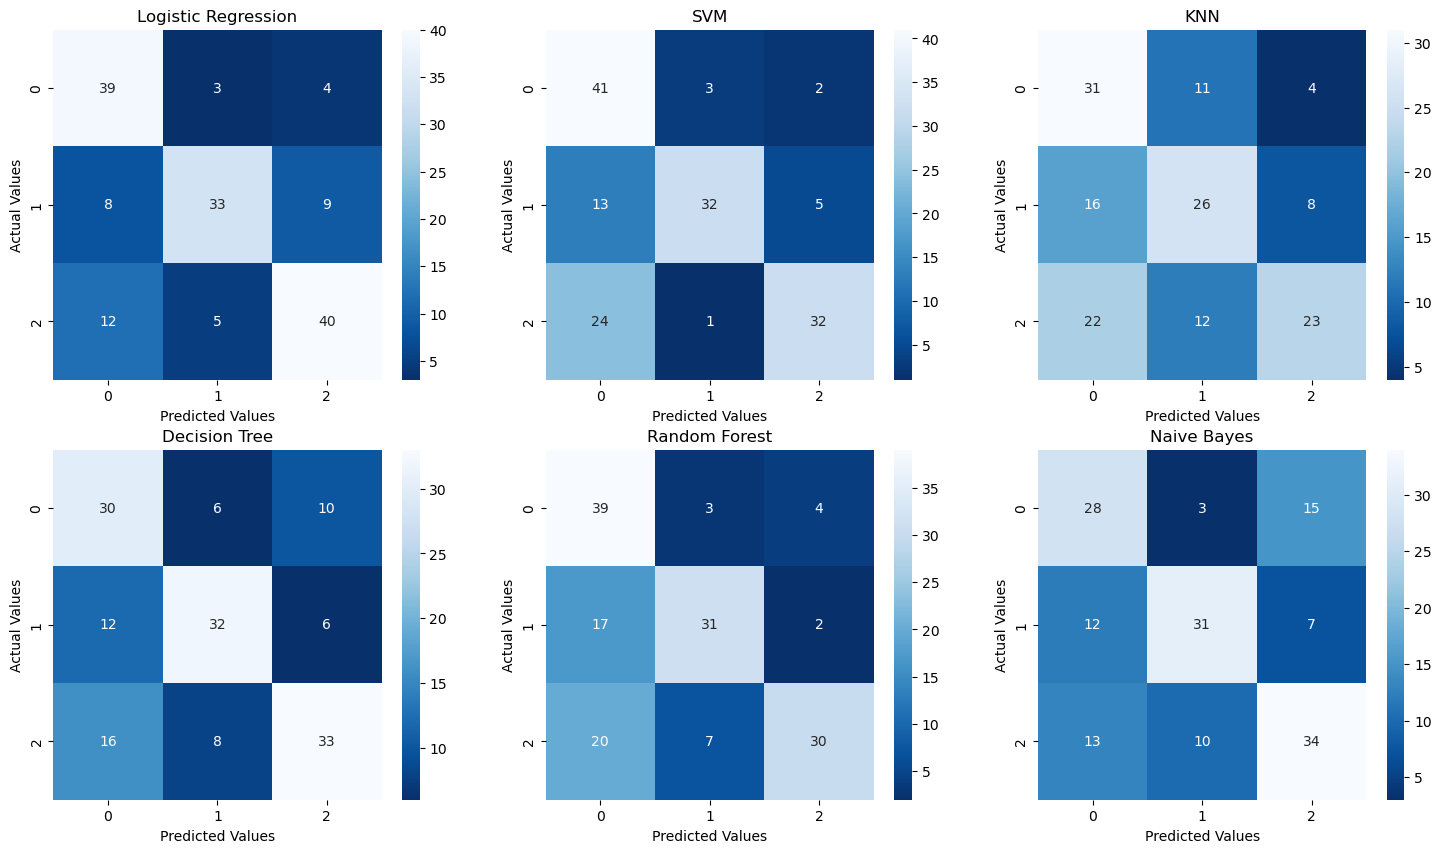

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [108]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list}) #, 'AUC':auc_list}
result_df
result_df.to_csv('weather_results.csv')